**SGD One Class SVM**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import torch
from util import *

In [2]:
class CFG:
    seed = 17
    type_num = 8
    selected_cols = ['motor_vibe', 'motor_current', 'motor_rpm']

In [3]:
seed_everything(CFG.seed)

c:\Users\Root\dacon\AiSparkChallenge4th-3\.conda\lib\site-packages\torch\random.py:46: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem . (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:84.)
  return default_generator.manual_seed(seed)


In [4]:
train = pd.read_csv('../data/train_data.csv')
test = pd.read_csv('../data/test_data.csv')

In [5]:
train_type = train['type']
test_type = test['type']

In [6]:
train = train[CFG.selected_cols]
test = test[CFG.selected_cols]
train['type'] = train_type
test['type'] = test_type

In [7]:
outliers = np.load("../outliers.npy")

In [8]:
train.drop(outliers, inplace=True)

In [9]:
data_ct, type_ct = build_container(train, test, type_num=CFG.type_num)
data_ct = [pca(*y) for y in [scaler(*x) for x in data_ct]]

In [10]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

test_concat = []
for i, (train_df, test_df) in enumerate(data_ct):
    model = OneClassSVM(nu=0.1, kernel='linear', gamma='scale')
    is_anomaly = svm_detect_anomaly(train_df, test_df, model)
    test_concat.append(test_df.copy().assign(anomaly=is_anomaly))

In [11]:
test_concat[0]['anomaly'].value_counts()

1    851
0    445
Name: anomaly, dtype: int64

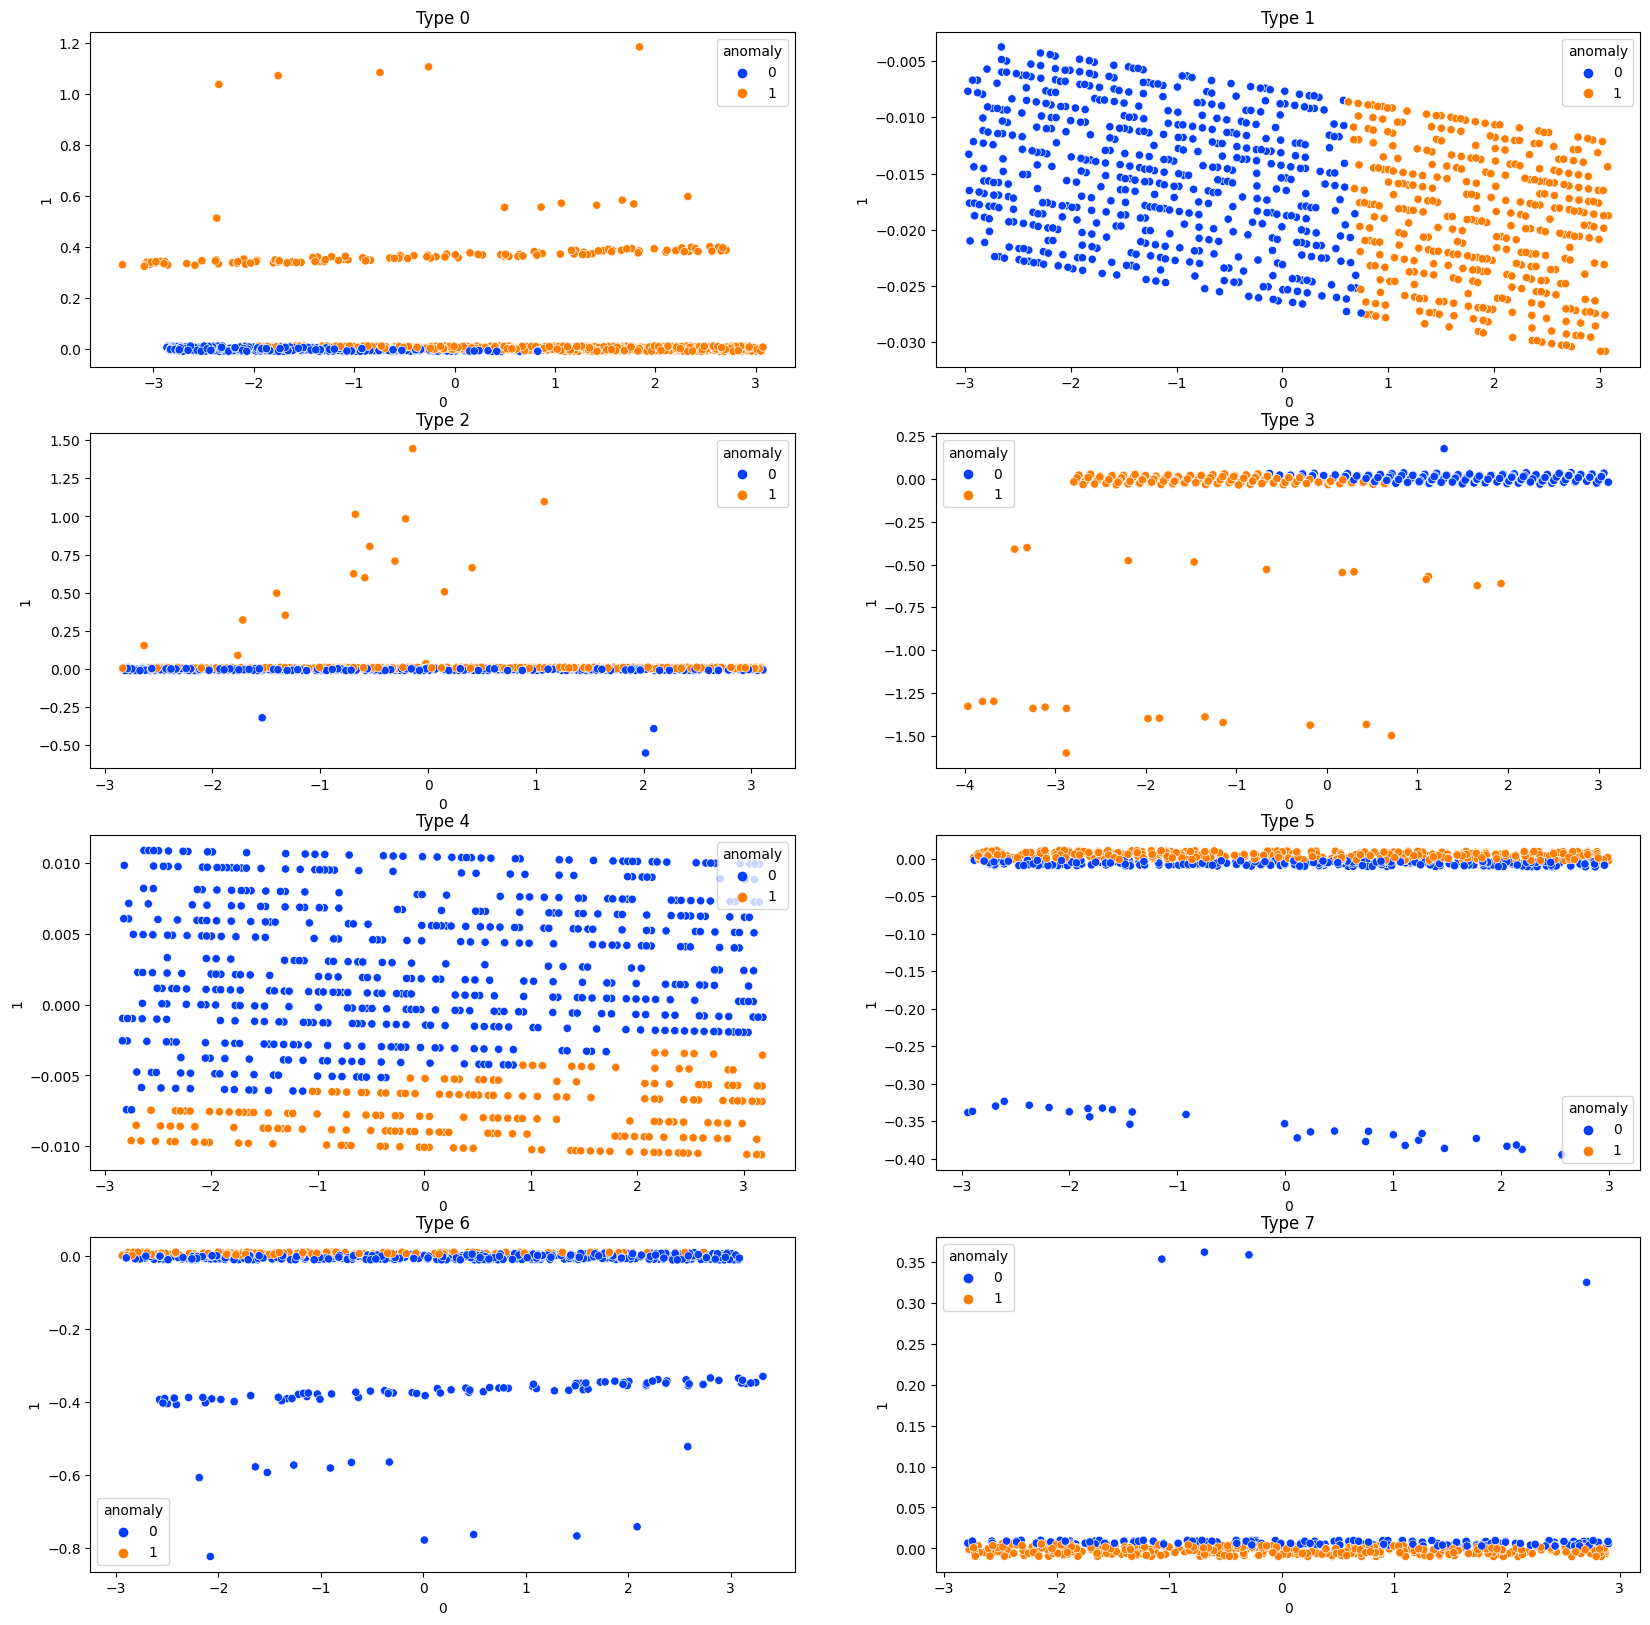

In [12]:
fig = plt.figure(figsize=(20,20))
for i, test_data in enumerate(test_concat):
    ax = plt.subplot(4,2,i+1)
    ax.set_title(f"Type {i}")
    sns.scatterplot(data=test_data, x='0', y='1', hue='anomaly', palette='bright')